In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\Sharmila srinithi\Downloads\ASSIGNMENT-4\Mall_Customers.csv")

In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#Uni-variate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

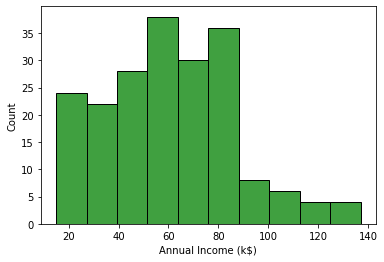

In [6]:
sns.histplot(data['Annual Income (k$)'], color="green")

In [7]:
# Bi-Variate Analysis

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

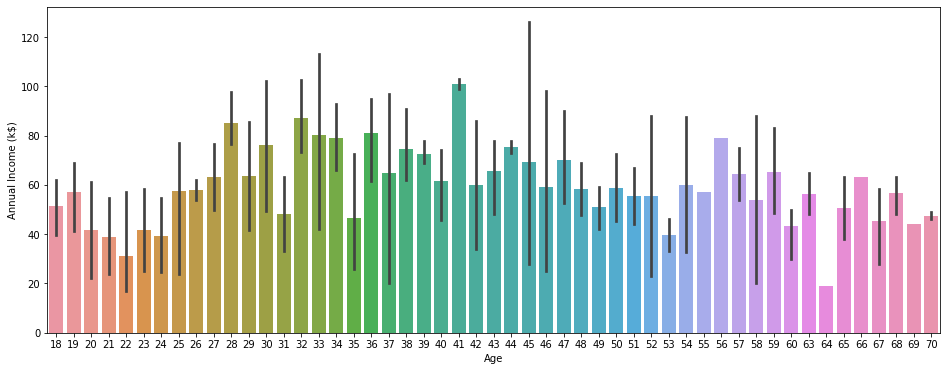

In [8]:
plt.figure(figsize=(16,6))
sns.barplot(data['Age'],data['Annual Income (k$)'])

In [9]:
# Multi-variate Analysis

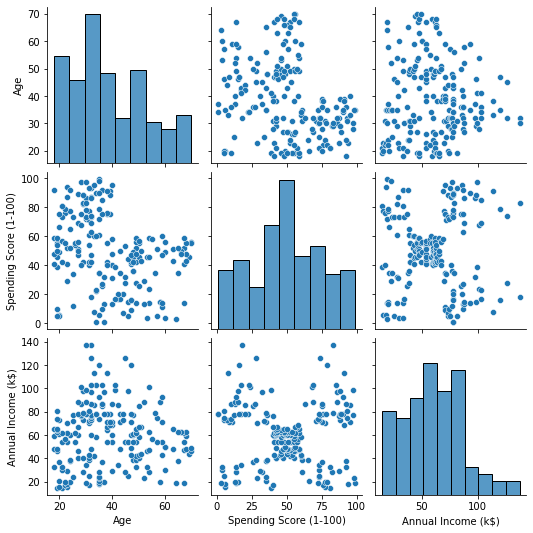

In [10]:
sns.pairplot(data=data[["Age", "Gender","Spending Score (1-100)","Annual Income (k$)"]])

In [11]:
#4. Perform descriptive statistics on the dataset.

In [12]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [13]:
data.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [14]:
data.shape

(200, 5)

In [15]:
#5. Check for Missing values and deal with them.

In [16]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [17]:
data.drop('CustomerID',axis=1,inplace=True)
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [18]:
#6. Find the outliers and replace them outliers

In [19]:
for i in data:
    if data[i].dtype=='int64':
        q1=data[i].quantile(0.25)
        q3=data[i].quantile(0.75)
        iqr=q3-q1
        upper=q3+1.5*iqr
        lower=q1-1.5*iqr
        data[i]=np.where(data[i] >upper, upper, data[i])
        data[i]=np.where(data[i] <lower, lower, data[i])

In [20]:
#After removing outliers , boxplot will be like

{'whiskers': [<matplotlib.lines.Line2D at 0x295836c7760>,
 'caps': [<matplotlib.lines.Line2D at 0x295836c7dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x295836c7490>],
 'medians': [<matplotlib.lines.Line2D at 0x295836d42e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x295836d45b0>],
 'means': []}

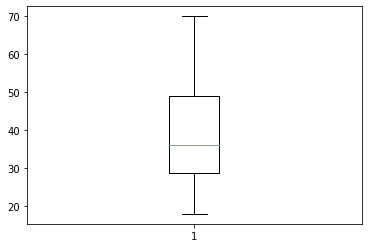

In [21]:
plt.boxplot(data['Age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x2958370be20>,
 'caps': [<matplotlib.lines.Line2D at 0x29583714400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2958370bb50>],
 'medians': [<matplotlib.lines.Line2D at 0x295837149a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29583714c70>],
 'means': []}

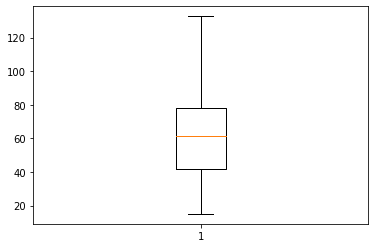

In [22]:
plt.boxplot(data['Annual Income (k$)'])

In [23]:
#7. Check for Categorical columns and perform encoding.

In [24]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()

In [25]:
data['Gender'] = l_en.fit_transform(data['Gender'])
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


In [26]:
#8. Scaling the data

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

In [28]:
#9. Perform any of the clustering algorithms

In [29]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(data_scaled)
res

array([2, 2, 1, 1, 1, 1, 3, 1, 0, 1, 0, 1, 3, 1, 4, 2, 1, 2, 0, 1, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 3, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 2, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 3, 2, 1, 1, 3, 3, 3, 3, 2, 3, 5, 6, 1, 5, 4, 6, 0, 6, 4, 6,
       1, 5, 4, 5, 7, 6, 4, 5, 7, 6, 1, 5, 4, 6, 0, 5, 7, 6, 4, 6, 7, 5,
       7, 5, 4, 5, 4, 5, 3, 5, 4, 5, 4, 5, 4, 5, 7, 6, 4, 6, 4, 6, 7, 5,
       0, 6, 0, 6, 7, 5, 4, 5, 7, 6, 7, 6, 7, 5, 7, 5, 4, 5, 7, 5, 7, 6,
       4, 6])

In [30]:
data1 = pd.DataFrame(data_scaled, columns = data.columns)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [31]:
data1['kclus']  = pd.Series(res)
data1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kclus
0,1.0,0.019231,0.000000,0.387755,2
1,1.0,0.057692,0.000000,0.816327,2
2,0.0,0.038462,0.008493,0.051020,1
3,0.0,0.096154,0.008493,0.775510,1
4,0.0,0.250000,0.016985,0.397959,1


In [32]:
data1['kclus'].unique()

array([2, 1, 3, 0, 4, 5, 6, 7])

In [33]:
data1['kclus'].value_counts()

3    39
1    37
0    29
2    24
5    22
6    18
4    17
7    14
Name: kclus, dtype: int64

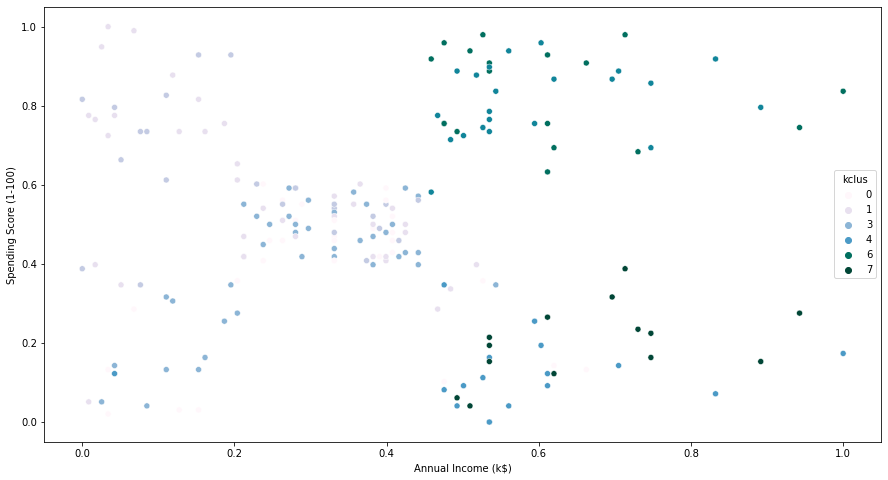

In [34]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x=data1['Annual Income (k$)'],
                y=data1['Spending Score (1-100)'],
                hue=data1['kclus'],
                palette='PuBuGn')
plt.show()

In [35]:
ind = data1.iloc[:,0:4]
ind.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [36]:
dep = data1.iloc[:,4:]
dep.head()

,kclus
0,2
1,2
2,1
3,1
4,1


In [37]:
#Splitting Dataset into train and test data

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(ind,dep,test_size=0.3,random_state=1)
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [39]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [40]:
y_train.head()

,kclus
116,3
67,3
78,1
42,0
17,2


In [41]:
y_test.head()

,kclus
58,1
40,3
34,3
102,0
184,7


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[2.69879876],
       [1.68927567],
       [1.44330204],
       [2.38255659],
       [5.33138733]])

In [44]:
#16. Measure the performance using Evaluation Metrics.

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score
mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)
rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)
mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)
acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  2.8182851631259465
The Root mean squared error is:  1.6787748994805547
The Mean absolute error is:  1.3845206427624508
The accuracy is:  0.4418009139935405
